In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [179]:
pf = pd.read_csv("musinsa_final.csv")
pf = pf.sort_values("TOTAL_SELL", ascending=False)
#title컬럼을 기준으로 중복 값 제거
pf.drop_duplicates(['TITLE'])
pf.head()

,index,TITLE,BRAND,SEASON,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
1937,1937,[세트] 하프 폴라 니트 티셔츠|[SET] Half Pola Knit T-Shirt,ESN,NaN,남,368284.0,38150.0,72214.0,23545.0,27868.0,92.0,2.0,32760.0,58.0,니트/스웨터/카디건,https://image.msscdn.net/images/goods_img/2017...
3189,3189,[세트] 하프 폴라 니트 티셔츠|[SET] Half Pola Knit T-Shirt,ESN,NaN,남,367050.0,38184.0,72214.0,23556.0,27892.0,92.0,2.0,32760.0,58.0,니트/스웨터/카디건,https://image.msscdn.net/images/goods_img/2017...
7,7,[세트] 하프 폴라 니트 티셔츠|[SET] Half Pola Knit T-Shirt,ESN,NaN,남,368097.0,38074.0,71638.0,23459.0,27760.0,92.0,2.0,32760.0,58.0,니트/스웨터/카디건,https://image.msscdn.net/images/goods_img/2017...
82,82,[세트] 하프 폴라 니트 티셔츠|[SET] Half Pola Knit T-Shirt,ESN,NaN,남,368097.0,38068.0,71638.0,23458.0,27751.0,92.0,2.0,32760.0,58.0,니트/스웨터/카디건,https://image.msscdn.net/images/goods_img/2017...
265,265,레거시91 테크 스우시캡 블랙 / 892651-010|레거시91 테크 스우시캡 블랙...,NIKE,NaN,남,76785.0,36972.0,50364.0,20949.0,16503.0,94.0,2.0,27900.0,44.0,캡/야구 모자,https://image.msscdn.net/images/goods_img/2016...


In [180]:
pf.head()
pf = pf.drop(['TITLE', 'BRAND' , 'SEASON' , 'SEX' , 'POPULARITY' , 'BUCKET' , 'IMG_URL' , 'LIKE_' , 'REVIEW' , 'CATEGORY_'] , axis=1)
#널 값을 알아본다
#모든 null값을 0으로 치환한다.
np.sum(pd.isnull(pf))


index                0
TOTAL_SELL       40748
SATISFACTION       818
DELIVERY_DATE     1617
PRICE              818
SALE             23367
dtype: int64

In [181]:
#Y값의 null이 많기 때문에 null 값을 0으로 바꿔준다
pf['TOTAL_SELL'] = np.where(pf['TOTAL_SELL'].isnull() ,0 , pf['TOTAL_SELL'])
pf['SALE'] = np.where(pf['SALE'].isnull() ,0 , pf['SALE'])

In [182]:
#null값이 총 row의 10%를 넘어버리면 분석에 방해를 준다
#y축인 TOTAL_SELL 값의 null 값이 40000이 되므로 삭제한다.
pf = pf[pf.TOTAL_SELL !=0]

In [183]:
#타겟값으로 사용할 사이트 첫번째 페이지를 나타내는 칼럼 0과 1로 나눙 진다.
pf['FIRST_PAGE'] = 0

In [184]:
pf.head()

,index,TOTAL_SELL,SATISFACTION,DELIVERY_DATE,PRICE,SALE,FIRST_PAGE
1937,1937,72214.0,92.0,2.0,32760.0,58.0,0
3189,3189,72214.0,92.0,2.0,32760.0,58.0,0
7,7,71638.0,92.0,2.0,32760.0,58.0,0
82,82,71638.0,92.0,2.0,32760.0,58.0,0
265,265,50364.0,94.0,2.0,27900.0,44.0,0


In [185]:
#1 페이지는 80이고 나머지는 2~ 페이지이기 떄문에 상위 80개만 1페이지에 들어간다
#total_sell을 기준으로 first_page를 나눠야 하는데 어떻 기준으로 나눌 것인가.
pf.head(80)
pf['FIRST_PAGE'][0:80] = 0
pf.head(90)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,index,TOTAL_SELL,SATISFACTION,DELIVERY_DATE,PRICE,SALE,FIRST_PAGE
1937,1937,72214.0,92.0,2.0,32760.0,58.0,0
3189,3189,72214.0,92.0,2.0,32760.0,58.0,0
7,7,71638.0,92.0,2.0,32760.0,58.0,0
82,82,71638.0,92.0,2.0,32760.0,58.0,0
265,265,50364.0,94.0,2.0,27900.0,44.0,0
149,149,44683.0,92.0,2.0,39200.0,30.0,0
1309,1309,42763.0,91.0,2.0,50000.0,0.0,0
1697,1697,42763.0,91.0,2.0,50000.0,0.0,0
1541,1541,42763.0,91.0,2.0,50000.0,0.0,0
1945,1945,38803.0,93.0,2.0,59000.0,24.0,0


In [186]:
#First_page에 1을 선정하는 과정중 TOTAL_SELL을 1000개 단위로 나눠 중간값을 구함
total_sell_means = pd.DataFrame(data=[pf['TOTAL_SELL'][0:1000].mean(),pf['TOTAL_SELL'][1001:2000].mean(),pf['TOTAL_SELL'][2001:3000].mean(),pf['TOTAL_SELL'][3001:4000].mean(),pf['TOTAL_SELL'][4001:5000].mean(),pf['TOTAL_SELL'][5001:6000].mean(),pf['TOTAL_SELL'][6001:7000].mean(),pf['TOTAL_SELL'][7001:8000].mean(),pf['TOTAL_SELL'][8001:9000].mean(),pf['TOTAL_SELL'][9001:].mean()], index=range(0,10), columns=['means'])
display(pd.DataFrame(total_sell_means))

,means
0,5292.786000
1,499.326326
2,117.867868
3,62.260260
4,36.876877
5,25.141141
6,18.460460
7,14.378378
8,11.449449
9,10.000000


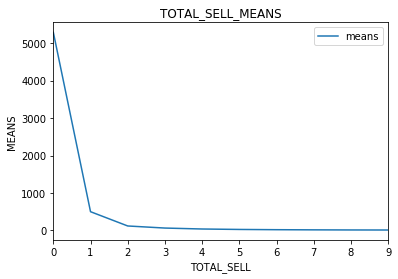

In [187]:
#TOTAL_SELL을 sort하고 시각화 한 결과 다음과 같은 그래프 확인
total_sell_means.plot()
plt.title("TOTAL_SELL_MEANS")
plt.xlabel("TOTAL_SELL")
plt.ylabel("MEANS")
plt.show()